<a href="https://colab.research.google.com/github/Gab-mf/classifica-ao-de-clientes-com-risco-de-churn/blob/main/case_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação do conjunto de dados

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve

In [ ]:
df = pd.read_csv("BankChurners.csv")

In [ ]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


# Tratamento dos dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [ ]:
df['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'].value_counts()

0.000199    80
0.000314    78
0.000303    77
0.000187    73
0.000114    71
            ..
0.997660     1
0.000143     1
0.000466     1
0.992700     1
0.996620     1
Name: Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1, Length: 1704, dtype: int64

In [ ]:
df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

# Análise exploratória de dados

In [ ]:
df_churn = pd.DataFrame(data=df['Attrition_Flag'].value_counts(), index=None)
df_churn

,Attrition_Flag
Existing Customer,8500
Attrited Customer,1627


In [ ]:
df_gender = pd.DataFrame(data=df['Gender'].value_counts())
df_gender

,Gender
F,5358
M,4769


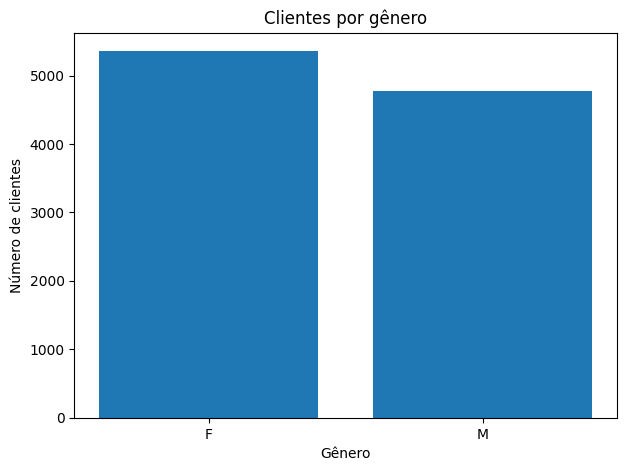

In [ ]:
plt.figure(figsize=(7,5))

plt.bar(df_gender.index, df_gender['Gender'])

plt.xlabel("Gênero")
plt.ylabel("Número de clientes")

plt.title("Clientes por gênero")

plt.show()

In [ ]:
df_estado_civil = pd.DataFrame(data = df['Marital_Status'].value_counts())
df_estado_civil

,Marital_Status
Married,4687
Single,3943
Unknown,749
Divorced,748


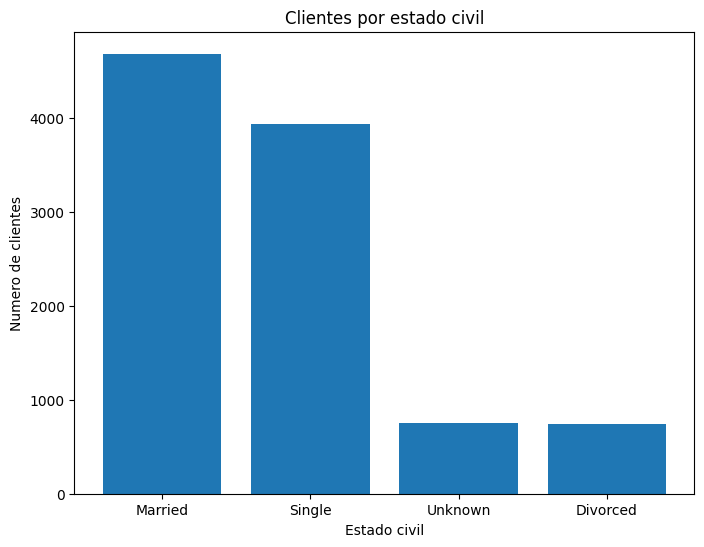

In [ ]:
plt.figure(figsize=(8,6))

plt.bar(df_estado_civil.index, df_estado_civil['Marital_Status'])

plt.xlabel("Estado civil")
plt.ylabel("Numero de clientes")

plt.title("Clientes por estado civil")

plt.show()

In [ ]:
df_salario = pd.DataFrame(data = df['Income_Category'].value_counts())
df_salario

,Income_Category
Less than $40K,3561
$40K - $60K,1790
$80K - $120K,1535
$60K - $80K,1402
Unknown,1112
$120K +,727


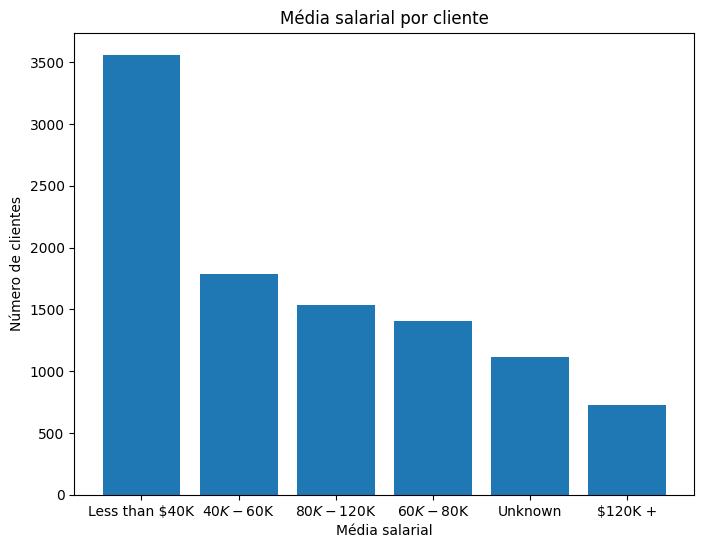

In [ ]:
plt.figure(figsize=(8,6))

plt.bar(df_salario.index, df_salario['Income_Category'])

plt.xlabel("Média salarial")
plt.ylabel("Número de clientes")

plt.title("Média salarial por cliente")

plt.show()

In [ ]:
df_cartao = pd.DataFrame(data= df['Card_Category'].value_counts())
df_cartao

,Card_Category
Blue,9436
Silver,555
Gold,116
Platinum,20


In [ ]:
df_cartao['Porcentagem (%)'] = round((df_cartao['Card_Category']/df_cartao['Card_Category'].sum()*100), 2)
df_cartao

,Card_Category,Porcentagem (%)
Blue,9436,93.18
Silver,555,5.48
Gold,116,1.15
Platinum,20,0.20


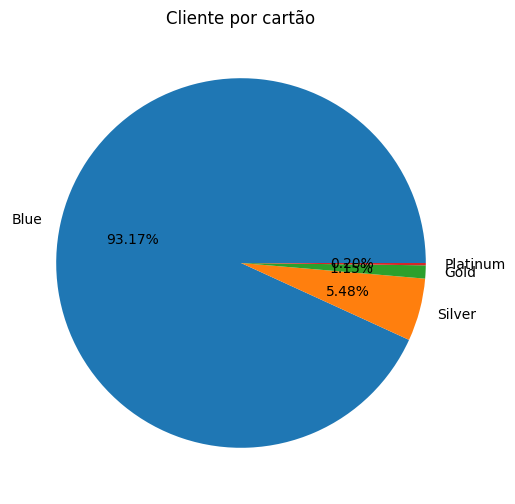

In [ ]:
plt.figure(figsize=(6,6))

plt.pie(df_cartao['Porcentagem (%)'], labels = df_cartao.index, autopct='%1.2f%%')

plt.title("Cliente por cartão")

plt.show()

In [ ]:
df_churn['porcentagem (%)'] = round((df_churn['Attrition_Flag']/df_churn['Attrition_Flag'].sum()*100), 2)

In [ ]:
df_churn

,Attrition_Flag,porcentagem (%)
Existing Customer,8500,83.93
Attrited Customer,1627,16.07


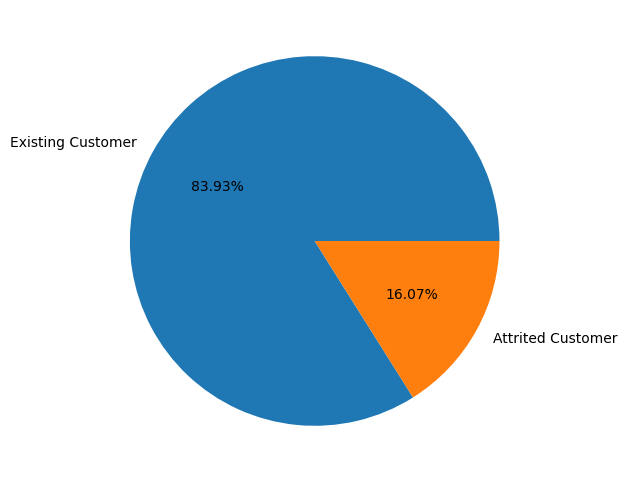

In [ ]:
plt.figure(figsize=(6,6))

plt.pie(df_churn['porcentagem (%)'], labels = df_churn.index, autopct='%1.2f%%')

plt.show()

In [ ]:
df.corr()

<ipython-input-23-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,1.000000,0.007613,0.006772,0.134588,0.006907,0.005729,0.005694,0.005708,0.000825,0.005633,0.017369,-0.019692,-0.002961,0.007696,0.000266
Customer_Age,0.007613,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
Dependent_count,0.006772,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
Months_on_book,0.134588,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541
Total_Relationship_Count,0.006907,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663
Months_Inactive_12_mon,0.005729,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503
Contacts_Count_12_mon,0.005694,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471
Credit_Limit,0.005708,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965
Total_Revolving_Bal,0.000825,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022
Avg_Open_To_Buy,0.005633,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808


<ipython-input-24-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

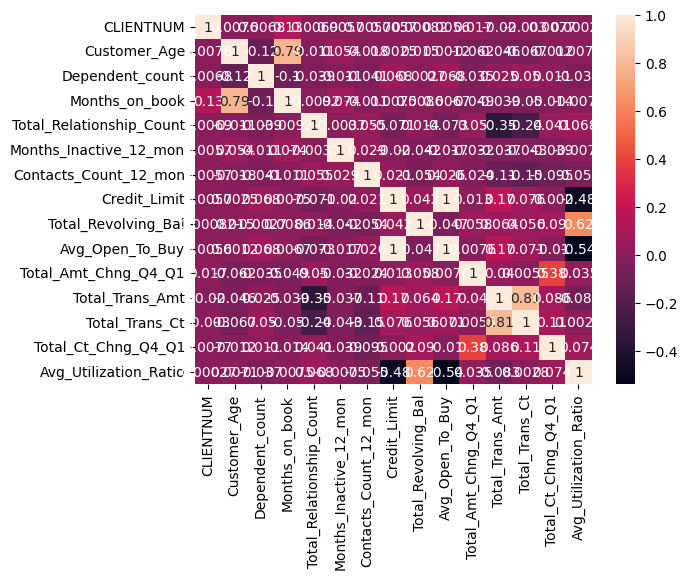

In [ ]:
sns.heatmap(df.corr(), annot=True)

# Pré-processamento dos dados

In [ ]:
df.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [ ]:
df.drop(columns=['CLIENTNUM'], inplace=True)

In [ ]:
X = df.drop(columns='Attrition_Flag')
y = df[['Attrition_Flag']]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(y.Attrition_Flag)
y.Attrition_Flag = le.transform(y.Attrition_Flag)

<ipython-input-30-4a6d6bd8bc9a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.Attrition_Flag = le.transform(y.Attrition_Flag)


In [ ]:
X = pd.get_dummies(X)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

X = pd.DataFrame(mm.fit_transform(X))

# Criação, treinamento e avaliação do modelo

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
y_train.value_counts()

Attrition_Flag
1                 6359
0                 1236
dtype: int64

In [ ]:
y_test.value_counts()

Attrition_Flag
1                 2141
0                  391
dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()

X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

In [ ]:
y_train_sm.value_counts()

Attrition_Flag
0                 6359
1                 6359
dtype: int64

In [ ]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

In [ ]:

for nome, model in classifiers.items():

    model.fit(X_train_sm, y_train_sm)
    y_pred = model.predict(X_test)

    print(f'Modelo:    {nome}\n')
    print(f"Acurácia (Treino): {accuracy_score(y_train_sm, model.predict(X_train_sm))}")
    print(f"Acurácia (Teste): {accuracy_score(y_test, model.predict(X_test))}")

    print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train_sm, model.predict(X_train_sm))}")
    print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, model.predict(X_test))}")

    print(f"Precision (Treino): {precision_score(y_train_sm, model.predict(X_train_sm))}")
    print(f"Precision (Teste): {precision_score(y_test, model.predict(X_test))}")

    print(f"Recall (Treino): {recall_score(y_train_sm, model.predict(X_train_sm))}")
    print(f"Recall (Teste): {recall_score(y_test, model.predict(X_test))}")

    print(f"F1-Score (Treino): {f1_score(y_train_sm, model.predict(X_train_sm))}")
    print(f"F1-Score (Teste): {f1_score(y_test, model.predict(X_test))}")

    print(f"ROCAUC (Treino): {roc_auc_score(y_train, model.predict_proba(X_train)[:,1])}")
    print(f"ROCAUC (Teste): {roc_auc_score(y_test, model.predict_proba(X_test)[:,1])}")
    print("====================================")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Modelo:    LogisiticRegression

Acurácia (Treino): 0.874351313099544
Acurácia (Teste): 0.8522906793048973
Acurácia Balanceada (Treino): 0.874351313099544
Acurácia Balanceada (Teste): 0.842626781232567
Precision (Treino): 0.8792416759598535
Precision (Teste): 0.9647553918990005
Recall (Treino): 0.8679037584525869
Recall (Teste): 0.8566090611863615
F1-Score (Treino): 0.8735359290914847
F1-Score (Teste): 0.9074715487382483
ROCAUC (Treino): 0.928135262764952
ROCAUC (Teste): 0.9181872371229832


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Modelo:    KNearest

Acurácia (Treino): 0.9061959427582953
Acurácia (Teste): 0.7195892575039494
Acurácia Balanceada (Treino): 0.9061959427582953
Acurácia Balanceada (Teste): 0.6857660270614754
Precision (Treino): 0.9903189066059226
Precision (Teste): 0.917201166180758
Recall (Treino): 0.8204120144676836
Recall (Teste): 0.7347034096216721
F1-Score (Treino): 0.8973939967317451
F1-Score (Teste): 0.8158713692946058
ROCAUC (Treino): 0.9795456558016542
ROCAUC (Teste): 0.7341987096404266
Modelo:    DecisionTreeClassifier

Acurácia (Treino): 1.0
Acurácia (Teste): 0.9182464454976303
Acurácia Balanceada (Treino): 1.0
Acurácia Balanceada (Teste): 0.8732653551236307
Precision (Treino): 1.0
Precision (Teste): 0.9640115163147792
Recall (Treino): 1.0
Recall (Teste): 0.9383465670247548
F1-Score (Treino): 1.0
F1-Score (Teste): 0.9510059171597633
ROCAUC (Treino): 1.0
ROCAUC (Teste): 0.8732653551236307


<ipython-input-67-6f7d21f95f96>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_sm, y_train_sm)


Modelo:    Random Forest

Acurácia (Treino): 1.0
Acurácia (Teste): 0.9541864139020537
Acurácia Balanceada (Treino): 1.0
Acurácia Balanceada (Teste): 0.9185575495352579
Precision (Treino): 1.0
Precision (Teste): 0.9755753875058712
Recall (Treino): 1.0
Recall (Teste): 0.9701074264362447
F1-Score (Treino): 1.0
F1-Score (Teste): 0.9728337236533957
ROCAUC (Treino): 1.0
ROCAUC (Teste): 0.9810483663847115


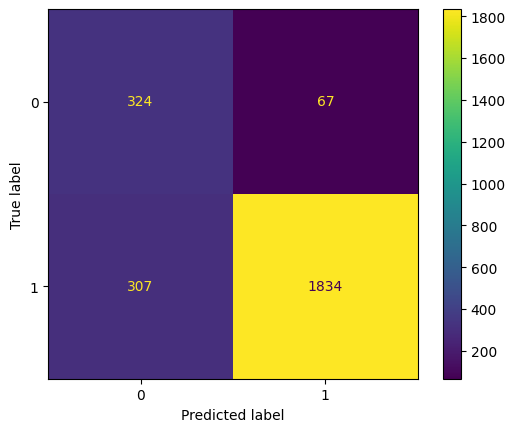

In [ ]:
# melhor modelo: regrssão logística

y_pred = classifiers["LogisiticRegression"].predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifiers["LogisiticRegression"].classes_)

disp.plot()
plt.show()

print("\n")

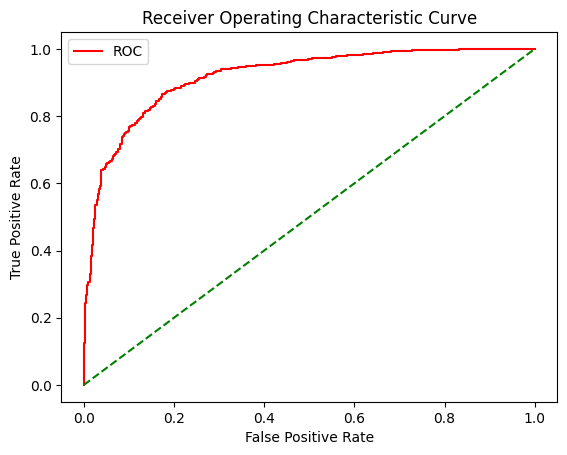

In [ ]:
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color="red", label="ROC")
    plt.plot([0, 1], [0, 1], color="green", linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic Curve")
    plt.legend()
    plt.show()


prob = classifiers["LogisiticRegression"].predict_proba(X_test)
prob = prob[:, 1]
fper, tper, thresholds = roc_curve(y_test, prob)
plot_roc_curve(fper, tper)